## create a model that accurately predicts the likelihood of heart disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

https://web.iitd.ac.in/~jay/dsl810/dsl810_spring2020/topics/data_science/multivariate_classification/heart_disease/UCI%20Machine%20Learning%20Repository_%20Heart%20Disease%20Data%20Set.pdf

Attribute Information:

- age
- sex (1=male,0=female)
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target:0 for no presence of heart disease, 1 for presence of heart disease


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## exploratory analysis

In [4]:
len(df)

303

In [5]:
df.info()

# no missing value in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

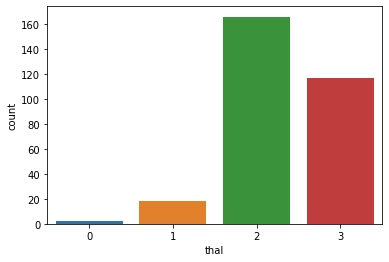

In [8]:
sns.countplot(x='thal',data=df);

In [9]:
df['thal'].mean()

2.3135313531353137

In [10]:
df.loc[df['thal']==0]

df['thal'] = df['thal'].replace(0,2)

df['thal'].unique()

array([1, 2, 3], dtype=int64)

In [11]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

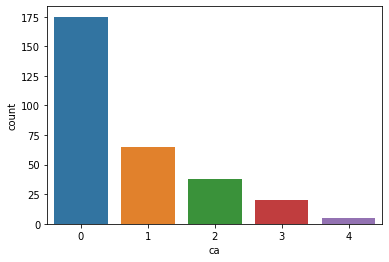

In [12]:
sns.countplot(x='ca',data=df);

In [13]:
df['ca'].mean()

0.7293729372937293

In [14]:
df.loc[df['ca']==4]

df['ca'] = df['ca'].replace(4,0)

df['ca'].unique()

array([0, 2, 1, 3], dtype=int64)

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


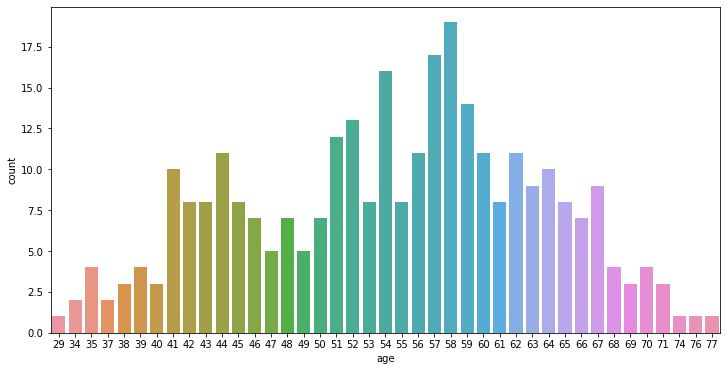

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='age',data=df);

# min age = 25
# max age = 77 
# mean age = 54

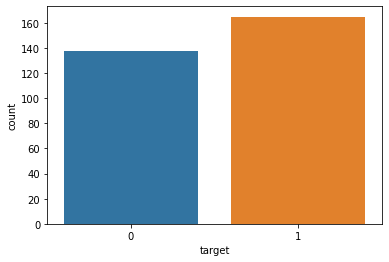

In [17]:
sns.countplot(x='target',data=df);

# the dataset had more patient with heart disease

In [18]:
presence =[138,165]
labels = ['no heart disease','with heart disease']

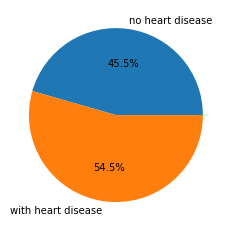

In [19]:
plt.axis=['equal']
plt.pie(presence,labels=labels,radius=1.0,autopct='%0.1f%%');

https://www.kaggle.com/chingchunyeh/heart-disease-report

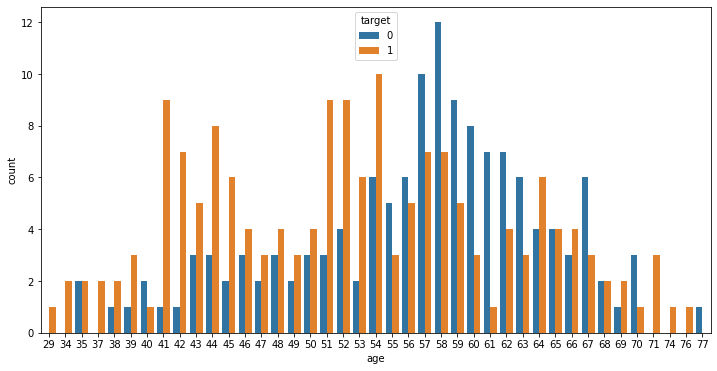

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='age',data=df,hue='target');

# more patient with heart disease for patient age range of 40-54
# more patient without heart disease for patient age range 55-70

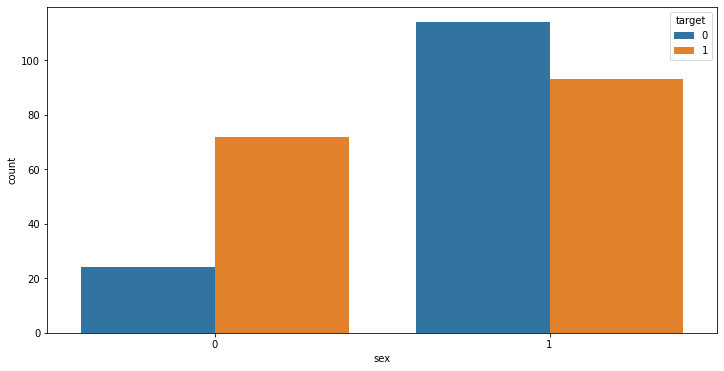

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='sex',data=df,hue='target');

# 1=male,0=female
# the dataset had more male patients
# female had more patients with heart disease
# male had more patients without heart disease

In [22]:
df.corr()['target'].sort_values()

ca         -0.465008
exang      -0.436757
oldpeak    -0.430696
thal       -0.363322
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [35]:
df_simp=df[['age','restecg','thalach','cp','slope','target']]

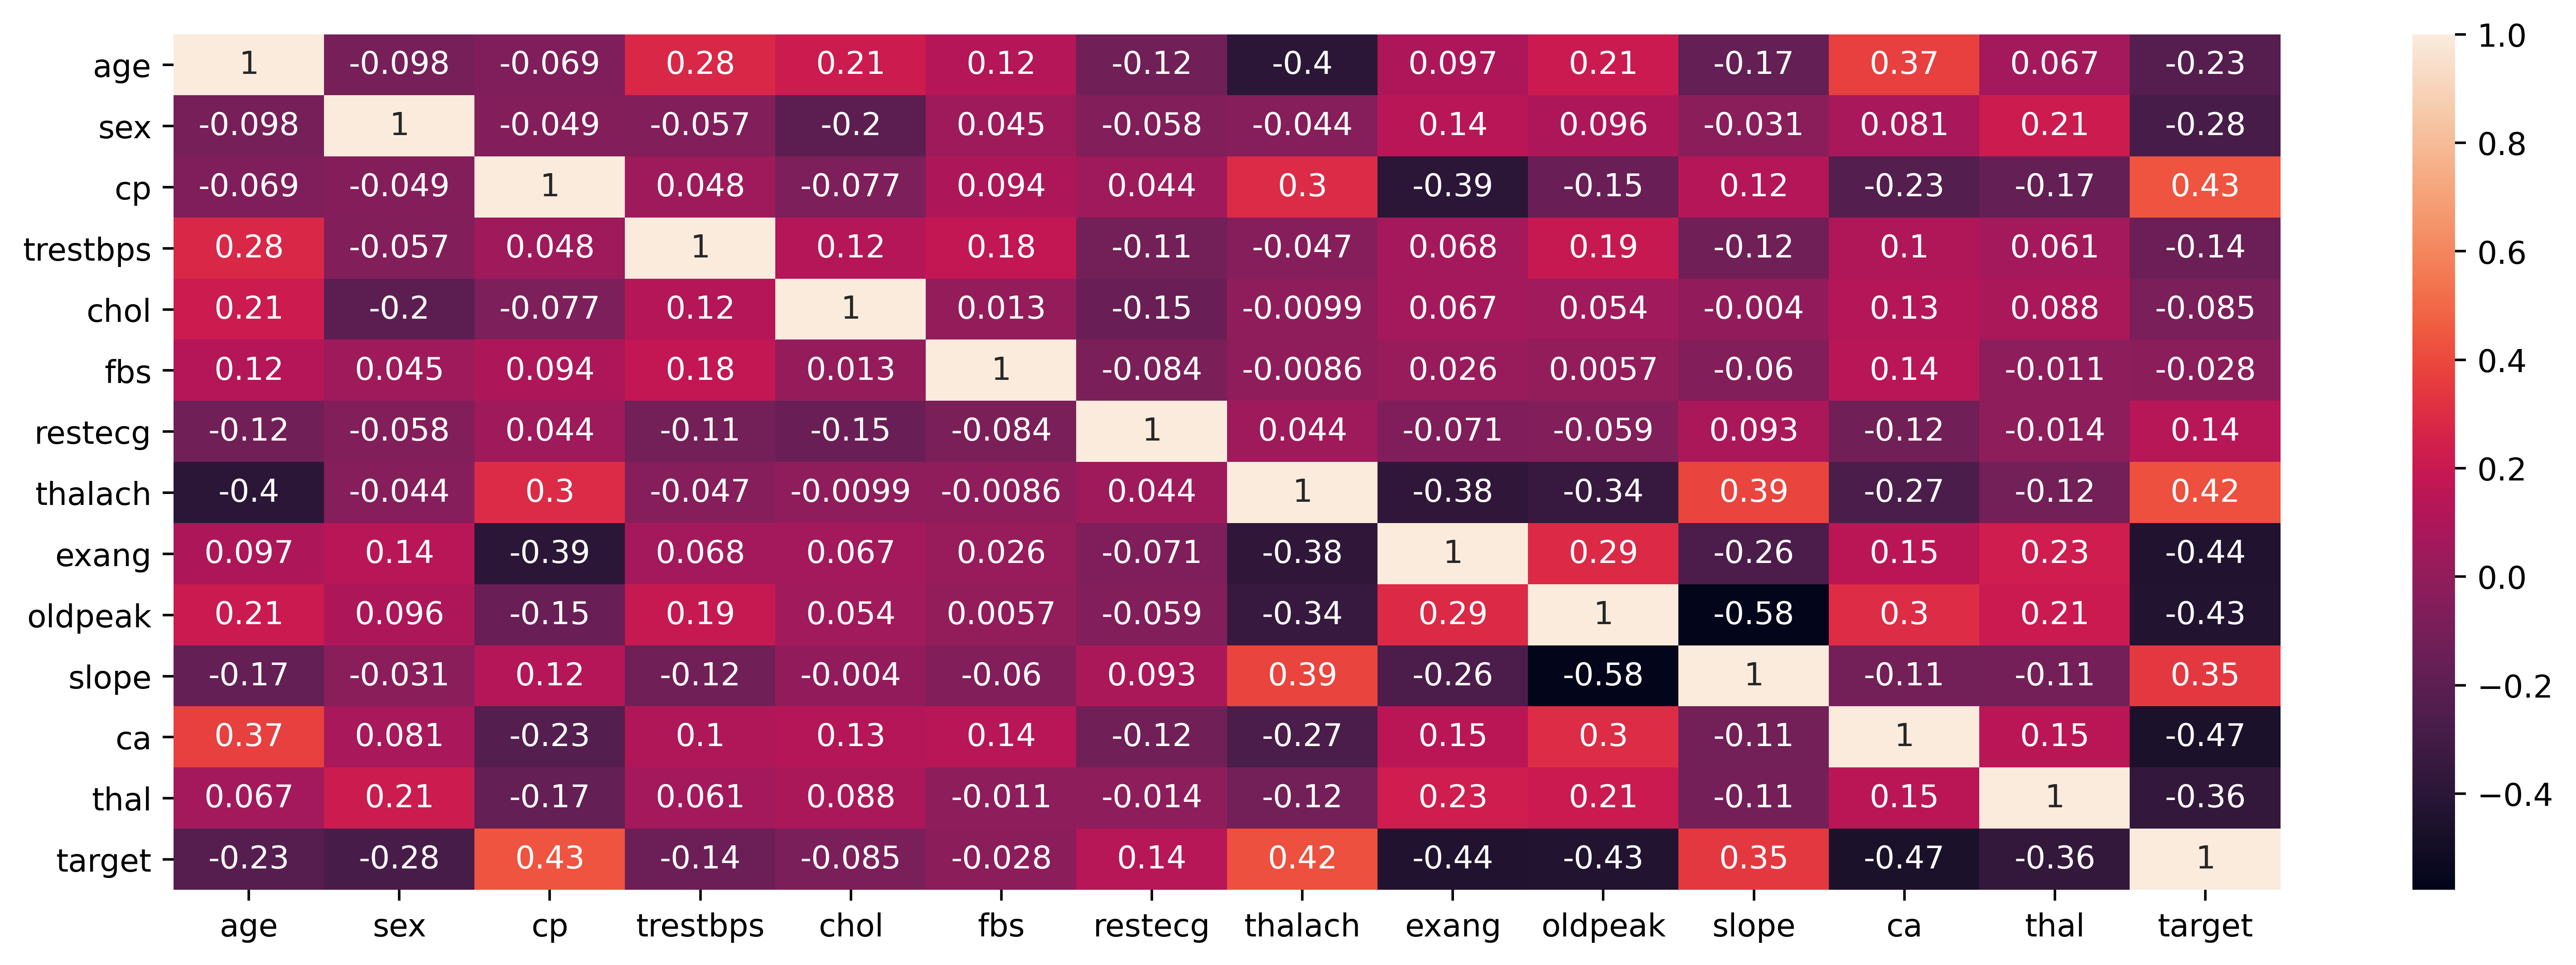

In [36]:
plt.figure(figsize=(15,5),dpi=500)
sns.heatmap(df.corr(),annot=True);


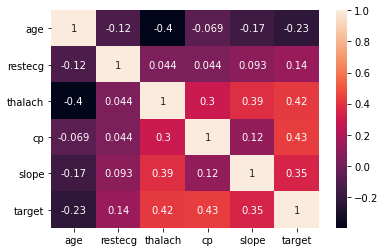

In [37]:
sns.heatmap(df_simp.corr(),annot=True);

# max heart rate, chest pain type affect the target greatly

**chest pain**

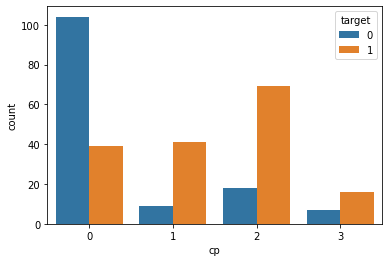

In [26]:
sns.countplot(x='cp',data=df,hue='target');

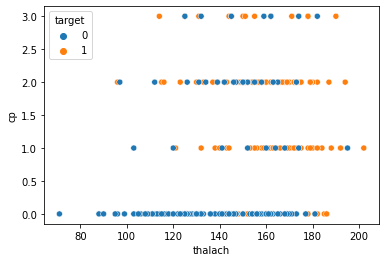

In [39]:
sns.scatterplot(x='thalach',y='cp',data=df,hue='target');

**thalach - maximum heart rate**

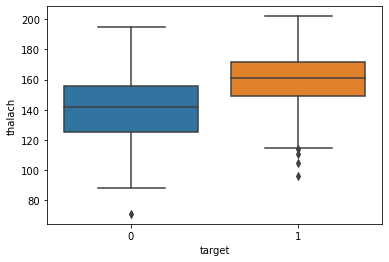

In [27]:
sns.boxplot(x='target',y='thalach',data=df);

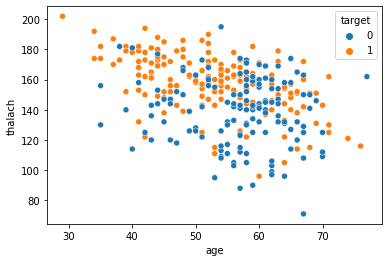

In [28]:
sns.scatterplot(x='age',y='thalach',data=df_simp,hue='target');

# higher level of cp, higher posibility of heart disease

**slope - slope of peak exercise**

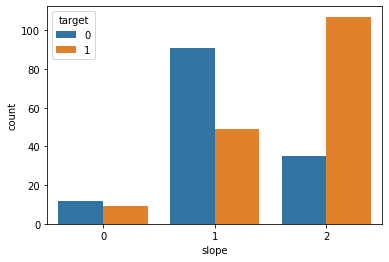

In [56]:
sns.countplot(x='slope',data=df,hue='target');

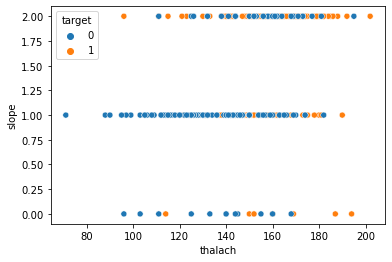

In [57]:
sns.scatterplot(x='thalach',y='slope',data=df_simp,hue='target');

**restecg - resting electrocardiographic**

In [53]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

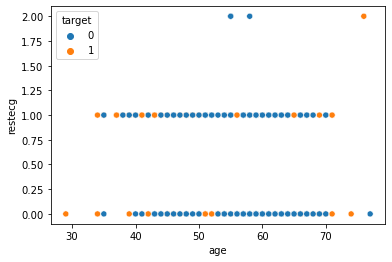

In [55]:
sns.scatterplot(x='age',y='restecg',data=df,hue='target');

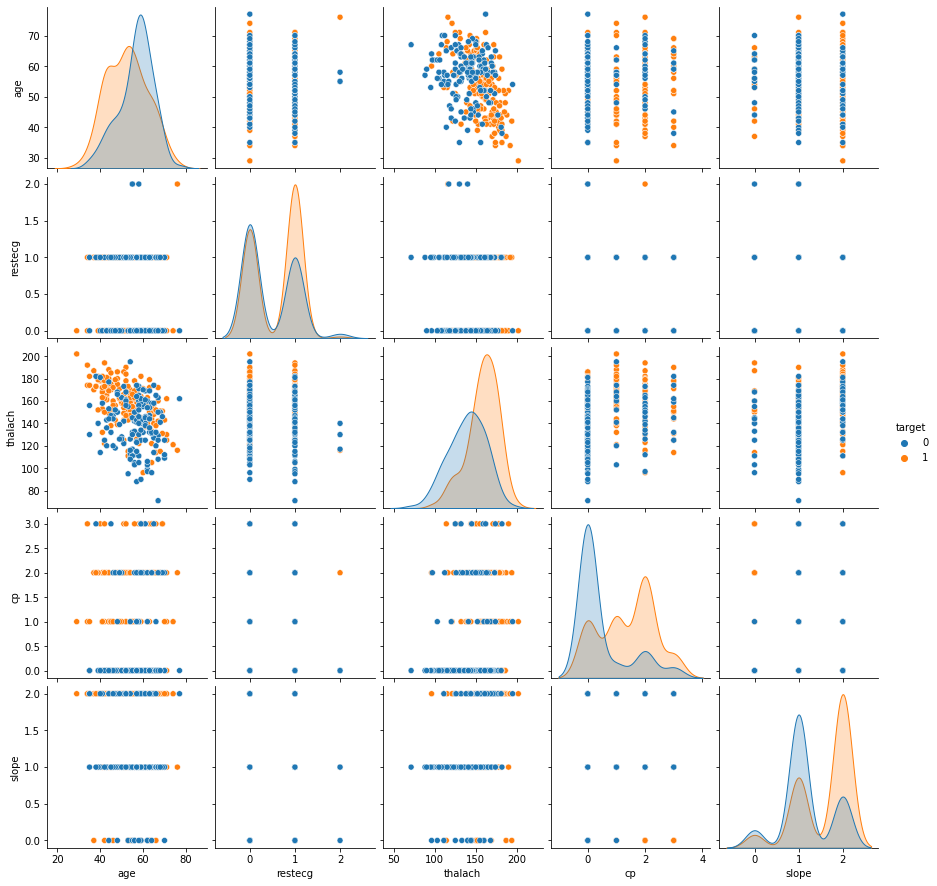

In [58]:
sns.pairplot(data=df_simp,hue='target');

In [31]:
df.to_csv('health_disease_clean_data.csv',index=False)